In [1]:
# 📈 Polynomial Regression
# Polynomial Regression is a form of Regression Analysis (a supervised machine learning technique) where the relationship between the independent variable (X) and the dependent variable (y) is modeled as an n^{th}-degree polynomial.

# It is used when the data does not have a linear relationship, and a straight line is not adequate to fit the data points.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
# --- 1. Prepare Non-Linear Data ---
# Create some non-linear data for demonstration
X = np.arange(0, 10).reshape(-1, 1)  # Input feature (X)
# Target variable (y) is roughly y = X^2 + noise
y = np.array([1, 4, 5, 8, 12, 20, 30, 45, 50, 75])

In [4]:
# --- 2. Feature Transformation (The Polynomial Step) ---
# Define the degree of the polynomial (e.g., degree=3 for X, X^2, X^3)
degree_of_polynomial = 3
poly_features = PolynomialFeatures(degree=degree_of_polynomial, include_bias=False)

In [5]:
# Transform the original feature X into polynomial features
# X_poly will now contain [X, X^2, X^3]
X_poly = poly_features.fit_transform(X)
X_poly

array([[  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.],
       [  7.,  49., 343.],
       [  8.,  64., 512.],
       [  9.,  81., 729.]])

In [6]:
# Display the original and transformed features for the first few rows
print(f"Original Feature X (first 3): \n{X[:3].flatten()}")
print(f"Transformed Features X_poly (first 3 rows):\n{X_poly[:3]}\n")

Original Feature X (first 3): 
[0 1 2]
Transformed Features X_poly (first 3 rows):
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 4. 8.]]



In [7]:
# --- 3. Train the Model (Linear Regression on Transformed Data) ---
# We still use LinearRegression, but on the new, transformed features
model = LinearRegression()
model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# --- 4. Make Predictions ---
# Predict using the polynomial features
y_pred = model.predict(X_poly)

In [9]:
# --- 5. Evaluate and Visualize ---
r2 = r2_score(y, y_pred)
print(f"Intercept (c): {model.intercept_:.2f}")
print(f"Coefficients (weights for X, X^2, X^3): {model.coef_}")
print(f"R-squared (R2) Score (Degree {degree_of_polynomial}): {r2:.4f}")

Intercept (c): 1.55
Coefficients (weights for X, X^2, X^3): [0.93686869 0.28030303 0.05555556]
R-squared (R2) Score (Degree 3): 0.9901


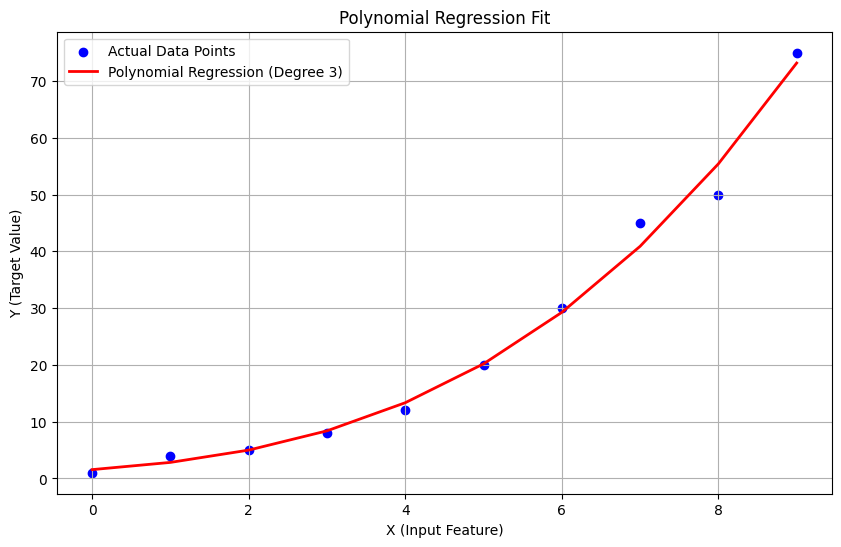

In [10]:
# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data Points")
plt.plot(
    X,
    y_pred,
    color="red",
    linewidth=2,
    label=f"Polynomial Regression (Degree {degree_of_polynomial})",
)
plt.xlabel("X (Input Feature)")
plt.ylabel("Y (Target Value)")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()